# The Repressilator

The repressilator is composed of three genes, each coding for an mRNA transcript and the corresponding translated protein. 
    This gives us six species to model and we denote the three mRNA species $m_1, m_2, m_3$ and the three protein species $p_1, p_2, p_3$ where 1,2 and 3 refer to the TetR, $\lambda$ cI and LacI genes respectively. We have a differential equation for the time evolution of each species and the model takes the form:

$$\begin{align} \frac{ dm_1 }{dt} &= -m_1 + \frac{\alpha}{1 + p_3^n } + \alpha_0   \\        
            \frac{ dp_1 }{dt} &= -\beta (p_1 - m_1) \notag \\ 
            \frac{ dm_2 }{dt} &= -m_2 + \frac{\alpha}{1 + p_1^n } + \alpha_0   \tag{1.9.1}  \\
            \frac{ dp_2 }{dt} &= -\beta (p_2 - m_2) \notag \\ 
            \frac{ dm_3 }{dt} &= -m_3 + \frac{\alpha}{1 + p_2^n } + \alpha_0    \\       
            \frac{ dp_3 }{dt} &= -\beta (p_3 - m_3), \label{eqn:repr}  
            \end{align}
            $$
where $\alpha_0$ is the basal rate of expression of each gene, $\alpha$ is the repression strength, $\beta$ is the protein and mRNA degradation rate constant (assumed equal) and $n$ is the Hill coefficient due to the cooperativity of the repression.


In [1]:
using DifferentialEquations

In [2]:
using Plots; gr()

Plots.GRBackend()

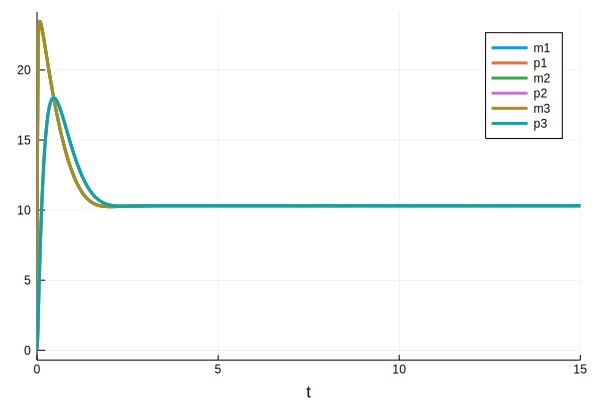

In [3]:
function repressilator1!(du,u,p,t)
    α_0,n,β,α = p
    du[1] = -u[1] + α/(1+u[6]^n) + α_0
    du[2] = -β*(u[2] - u[1])
    du[3] = -u[3] + α/(1+u[2]^n) + α_0
    du[4] = -β*(u[4] - u[3])
    du[5] =  -u[5] + α/(1+u[4]^n) + α_0
    du[6] = -β*(u[6] - u[5])
end

tspan = (0.0,15)
α_0=1
n=2
β=5
α=1000
u0=[1,0,1.0001,0,1,0] # it fails when u[1] and u[3] are similar
p=[α_0,n,β,α];

prob1 = ODEProblem(repressilator1!,u0,tspan,p)
sol1 = solve(prob1)
plot(sol1,label=["m1","p1","m2","p2","m3","p3"])

Using the DSL notation

In [4]:
repressilator2! = @ode_def ab begin
    dm1 = -m1 + α/(1+p3^n) + α_0
    dp1 = -β*(p1 - m1)
    dm2 = -m2 + α/(1+p1^n) + α_0
    dp2 = -β*(p2 - m2)
    dm3 =  -m3 + α/(1+p2^n) + α_0
    dp3 = -β*(p3 - m3)
    end α_0 n β α

(::ab{getfield(Main, Symbol("##3#7")),getfield(Main, Symbol("##4#8")),getfield(Main, Symbol("##5#9")),Nothing,Nothing,getfield(Main, Symbol("##6#10")),Expr,Expr}) (generic function with 2 methods)

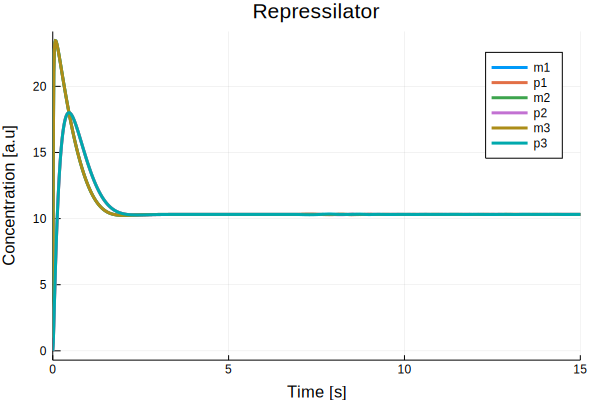

In [5]:
prob2 = ODEProblem(repressilator2!,u0,tspan,p)
sol2 = solve(prob2)
plot(sol2,label=["m1","p1","m2","p2","m3","p3"])
title!("Repressilator ")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

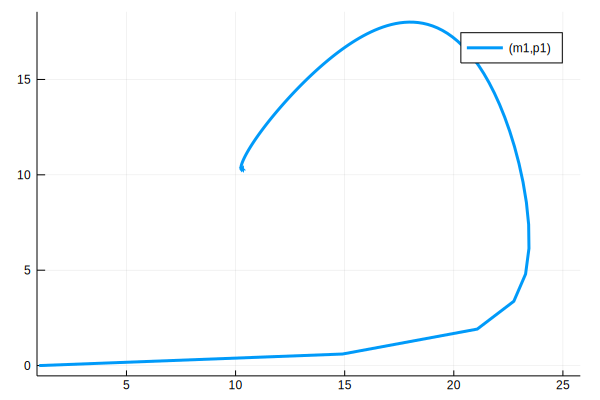

In [6]:
plot(sol2,vars=(1,2))

The system with these intial conditions ends up at a steady state (a spable spiral). The phase space plot shows the trajectory of the two components of the system $m_1$ and $p_1$ in phase space. This type of steady state is known as a stable spiral. The results would be the same for the pairs $m_2, p_2$ and $m_3, p_3$. Now if we change the intial condition

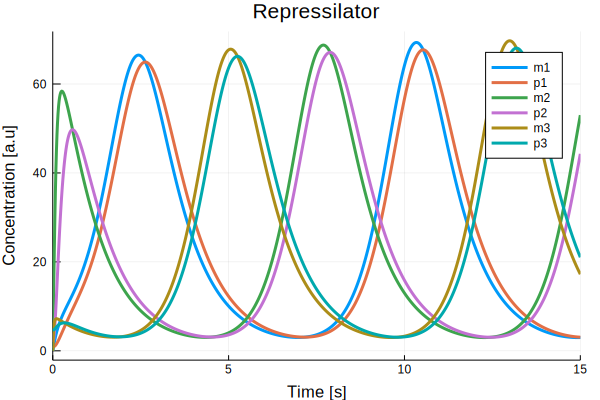

In [7]:
u0=[0,1,0.001,2,0,5]
prob3 = ODEProblem(repressilator2!,u0,tspan,p)
sol3 = solve(prob3)
plot(sol3,label=["m1","p1","m2","p2","m3","p3"])
title!("Repressilator ")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

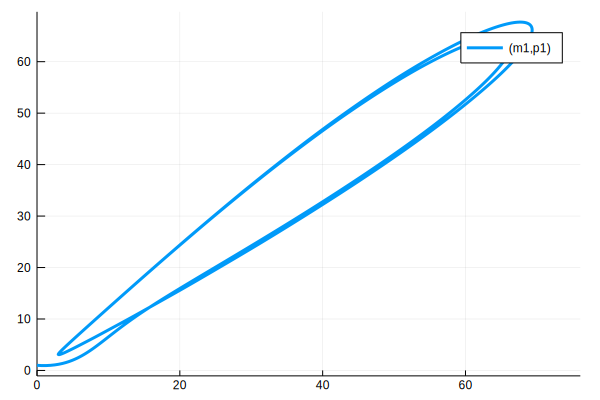

In [8]:
plot(sol3,vars=(1,2))

The time series clearly shows oscillatory solutions and the phase space plot shows the solution quickly moving on to the circular structure where it remains cycling forever. This is known as a limit cycle. 

We can also observe the transition from fixed point to oscillations by changing parameters. This type of behaviour is known as a bifurcation

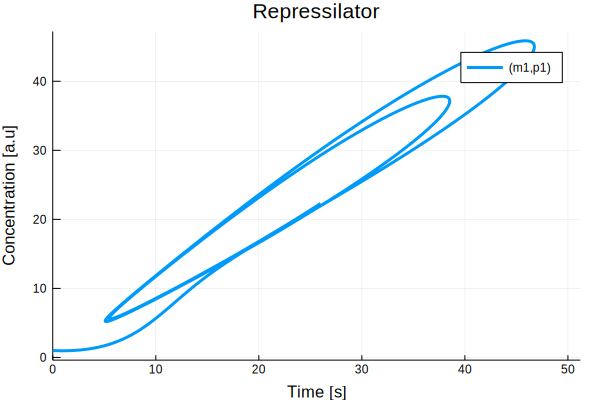

In [9]:
for i in [5,28,1000]
    p = [1 1.75 5 i]; 
    prob4 = ODEProblem(repressilator2!,u0,tspan,p)
    sol4 = solve(prob4)
    plot(sol4,vars=(1,2))
end
title!("Repressilator ")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")


In [10]:
function repressilator(α)
     p = [1 1.75 5 α]; 
     prob4 = ODEProblem(repressilator2!,u0,tspan,p)
     sol4 = solve(prob4)
     #plot_stuff(sol4)
     plot!(sol4,vars=(1,2))
end

repressilator (generic function with 1 method)

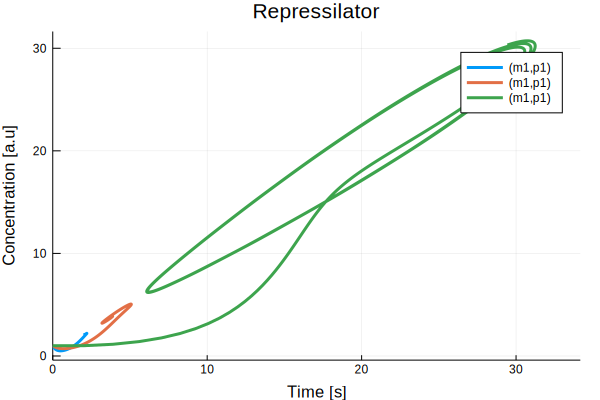

In [11]:
u0 = [0 1 0.0001 2 0 3]
plot()
for i in [5,28,1000]
    repressilator(i)
end
title!("Repressilator ")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

Changing parameter $\alpha$ moves the system from a monostable steady state to an oscillatory state. This is called a Hopf bifurcation. At a particular value of $\alpha$ (here between 28 and 29) the steady state becomes unstable and a limit cycle suddenly emerges. All trajectories move onto the limit cycle and remain there giving sustained oscillations